In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# For ML Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve

In [33]:
df = pd.read_csv(r'C:\Users\kumra\Downloads\Creditcard_Fraud_detection\fraudTrain.csv')

In [34]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [35]:
df.shape

(1296675, 23)

In [36]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [37]:
df.is_fraud.value_counts(dropna=False)

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [39]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [40]:
df.describe()


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [41]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [42]:
# 1. Extract time-based features
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek # Monday=0, Sunday=6

In [43]:
# 2. Calculate customer age at the time of transaction
df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

In [44]:
# 3. Calculate distance between customer and merchant
# Using Haversine formula for distance between two lat-long points
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    a = np.sin(dLat / 2) * np.sin(dLat / 2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dLon / 2) * np.sin(dLon / 2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

In [45]:
df['distance_km'] = haversine_distance(df['lat'], df['long'], df['merch_lat'], df['merch_long'])

In [46]:
# Now, drop original columns that are no longer needed or have been replaced
df = df.drop(['trans_date_trans_time', 'dob', 'lat', 'long', 'merch_lat', 'merch_long'], axis=1)

Fraudulent transactions: 0.58%


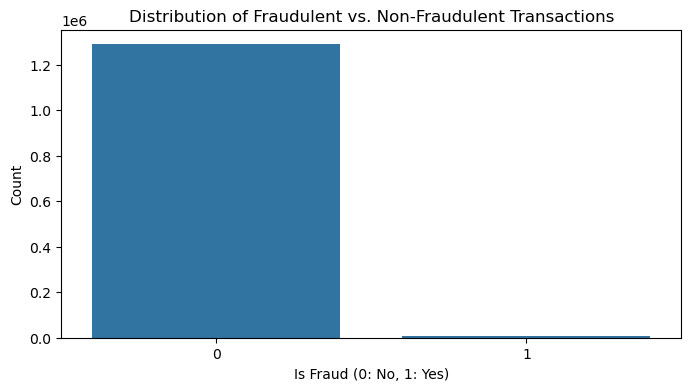

In [47]:
# 1. Analyze the target variable distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraud (0: No, 1: Yes)')
plt.ylabel('Count')
fraud_percentage = df['is_fraud'].value_counts(normalize=True) * 100
print(f"Fraudulent transactions: {fraud_percentage[1]:.2f}%")
plt.show()

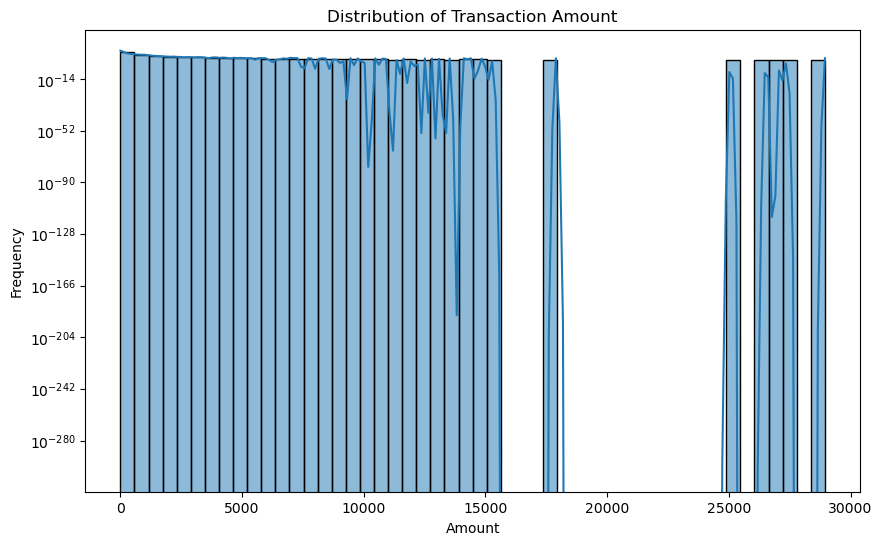

In [48]:
# 2. Analyze transaction amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
# Using a log scale can help with skewed data
plt.yscale('log')
plt.show()

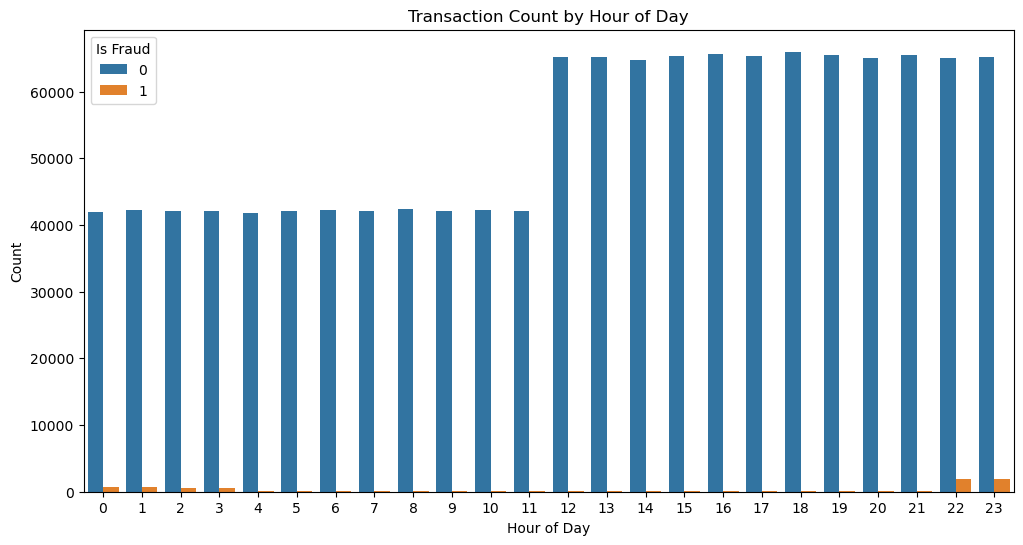

In [49]:
# 3. Explore transaction patterns by hour
plt.figure(figsize=(12, 6))
sns.countplot(x='transaction_hour', data=df, hue='is_fraud')
plt.title('Transaction Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

In [50]:
# 3. Data Preparation for Machine Learning

In [51]:
# Feature Selection and Encoding
df_model = df.drop(['cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'trans_num'], axis=1)

In [54]:
# Identify numerical and categorical features
numerical_features = df_model.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('is_fraud') # Remove target variable
categorical_features = df_model.select_dtypes(include='object').columns.tolist()

In [55]:
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['amt', 'city_pop', 'unix_time', 'transaction_hour', 'day_of_week', 'age', 'distance_km']
Categorical Features: ['merchant', 'category', 'gender']


In [56]:
# Define the preprocessing steps for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [57]:
# Separate features (X) and target (y)
X = df_model.drop('is_fraud', axis=1)
y = df_model['is_fraud']

In [58]:
# Split data into training and testing sets, stratifying on the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
# Handling Class Imbalance and Splitting Data
# Fraud datasets are almost always imbalanced. 
# Accuracy is not a reliable metric. 
# We must use techniques to handle this imbalance. 
# We will use stratify in the train-test split to maintain the same proportion of fraud cases in both sets.

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Fraud cases in training set:", sum(y_train))
print("Fraud cases in test set:", sum(y_test))

Training set shape: (1037340, 10)
Test set shape: (259335, 10)
Fraud cases in training set: 6005
Fraud cases in test set: 1501


In [60]:
# 4. Building and Training the ML Model
# We will build a pipeline that includes preprocessing and the model itself. 
# A Random Forest is a strong baseline for this type of problem.

# Create the machine learning pipeline
# We use class_weight='balanced' to help handle the imbalanced dataset
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1))])


In [61]:
# Train the model
print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)
print("Model training complete.")

Training the Random Forest model...
Model training complete.


In [62]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

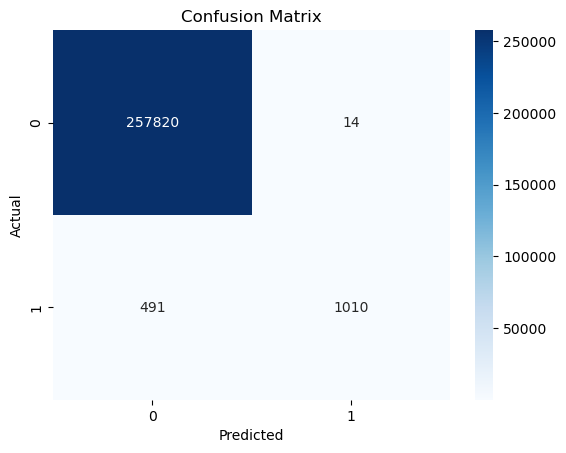

In [67]:
# --- Evaluation Metrics ---

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [64]:
# 2. Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))


Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    257834
       Fraud       0.99      0.67      0.80      1501

    accuracy                           1.00    259335
   macro avg       0.99      0.84      0.90    259335
weighted avg       1.00      1.00      1.00    259335



In [65]:
# 3. ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.9860


In [70]:
# Get the one-hot encoder from the preprocessor
one_hot_encoder = rf_model.named_steps['preprocessor'].transformers_[1][1]
# Get the names of the one-hot encoded columns
encoded_categorical_features = one_hot_encoder.get_feature_names_out(categorical_features)

In [71]:
# Combine the original numerical feature names with the new encoded categorical names
# Ensure the order is the same as how the preprocessor transforms the data
all_feature_names = numerical_features + list(encoded_categorical_features)

In [72]:
importances = rf_model.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})


In [73]:
# Sort the features by importance in descending order and select the top 20
top_25_features = importance_df.sort_values(by='Importance', ascending=False).head(25)

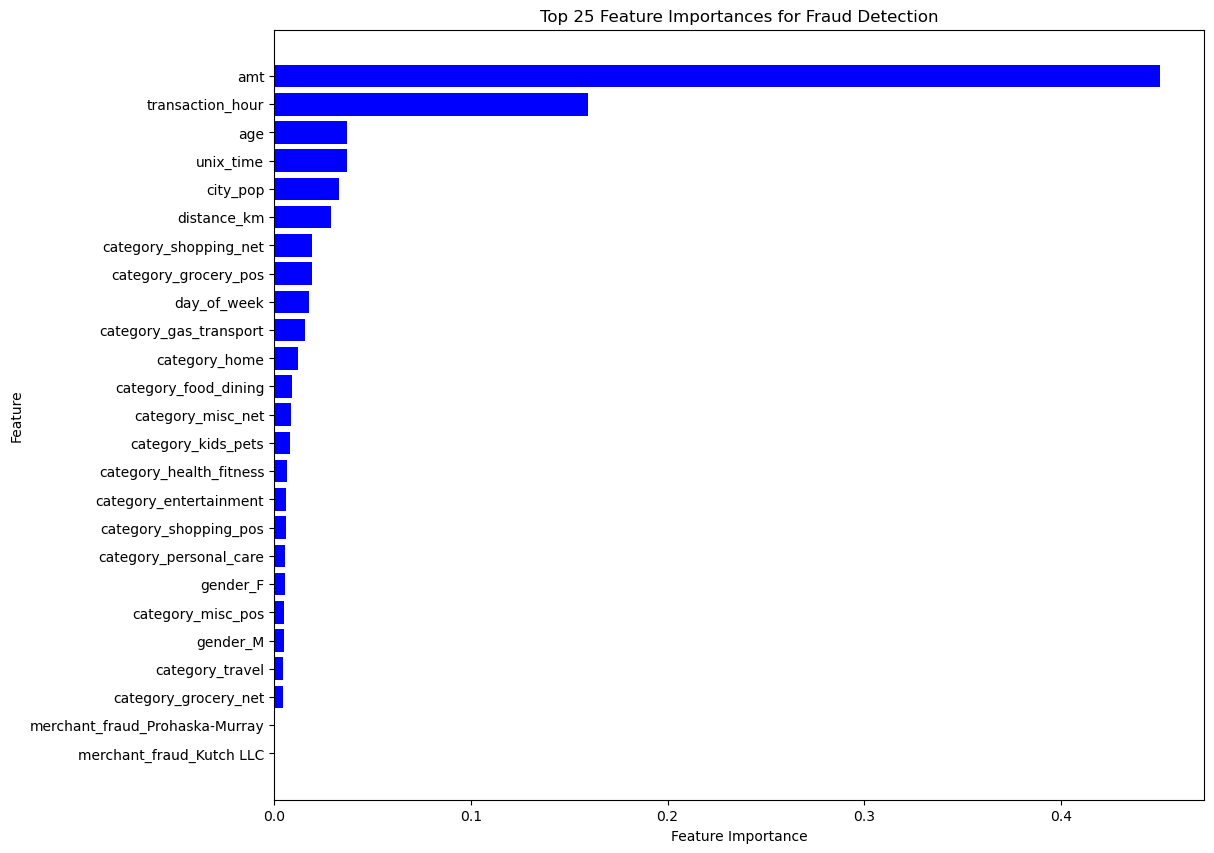

In [76]:
# --- Plot the Feature Importances ---
plt.figure(figsize=(12, 10))
plt.barh(top_25_features['Feature'], top_25_features['Importance'], color='blue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 25 Feature Importances for Fraud Detection")
plt.gca().invert_yaxis() # Display the most important feature at the top
plt.show()